# Data Science London + Scikit-learn

Scikit-learn is an open-source machine learning library for Python. Give it a try here!

## 1. Problem Definition

This is a binary classification task, You are evaluated on classification accuracy (the percentage of labels you predict correctly).  The training set has 1000 samples and the testing set has 9000.  Your prediction should be a 9000 x 1 vector of ones or zeros. You also need an Id column (1 to 9000) and should include a header. The format looks like this:
> Id, Solution <br/>
> 1, 0 <br/>
> 2, 1 <br/>
> ... <br/>
> 9000, 0 <br/>

## 2. Collecting the data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_train = pd.read_csv('data/train.csv', sep=',', header=None)
df_test = pd.read_csv('data/test.csv', sep=',', header=None)
df_labels = pd.read_csv('data/trainLabels.csv', sep=',', header=None)

## 3. Exploratory data analysis


In [12]:
df_train.shape, df_test.shape, df_labels.shape

((1000, 40), (9000, 40), (1000, 1))

In [13]:
df_labels.head(5)

,0
0,1
1,0
2,0
3,1
4,0


In [14]:
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [18]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


## 4. Missing data and Missing values


In [16]:
df_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [17]:
df_test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

## 5. Modeling


In [33]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold

#### Cross Validation


In [35]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### Using KNN for classification

In [22]:
X, y = df_train, np.ravel(df_labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Model complexity
neig = np.arange(1, 25)
kfold = 10
train_accuracy = []
val_accuracy = []
bestKnn = None
bestAcc = 0.0

In [24]:
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    val_accuracy.append(np.mean(cross_val_score(knn, X, y, cv=kfold)))
    if np.mean(cross_val_score(knn, X, y, cv=kfold)) > bestAcc:
        bestAcc = np.mean(cross_val_score(knn, X, y, cv=10))
        bestKnn = knn

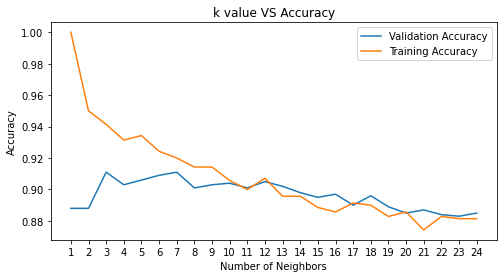

In [28]:
# Plot
plt.figure(figsize=[8,4])
plt.plot(neig, val_accuracy, label = 'Validation Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()

In [26]:
print('Best Accuracy without feature scaling:', bestAcc)
print(bestKnn)

Best Accuracy without feature scaling: 0.9109999999999999
KNeighborsClassifier(n_neighbors=3)


#### KNN 2


In [54]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, df_train, np.ravel(df_labels), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.9  0.91 0.88 0.91 0.82 0.94 0.92 0.92 0.87 0.94]


In [55]:
# kNN Score
round(np.mean(score)*100, 2)

90.1

#### Decision Tree

In [46]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, df_train, np.ravel(df_labels), cv=k_fold, n_jobs=2, scoring=scoring)
print(score)

[0.73 0.8  0.75 0.76 0.75 0.8  0.74 0.73 0.8  0.81]


In [49]:
# decision tree Score
round(np.mean(score)*100, 2)

83.6

#### Random Forest

In [47]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, df_train, np.ravel(df_labels), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86 0.83 0.86 0.82 0.78 0.87 0.83 0.77 0.84 0.9 ]


In [48]:
# Random Forest Score
round(np.mean(score)*100, 2)

83.6

#### Naive Bayes

In [45]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, df_train, np.ravel(df_labels), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82 0.81 0.81 0.77 0.78 0.86 0.81 0.79 0.79 0.87]


In [50]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

83.6

#### SVM

In [51]:
clf = SVC(kernel='poly')
scoring = 'accuracy'
score = cross_val_score(clf, df_train, np.ravel(df_labels), cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.87 0.86 0.88 0.87 0.85 0.92 0.92 0.86 0.88 0.9 ]


In [52]:
round(np.mean(score)*100,2)

88.1

## 6. Testing